In [149]:
import os
import sys
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.signal
import scipy.stats

from importlib import reload
import dill
import scipy.special
import scipy.signal
import scipy.optimize
import timeit 

import island_evo_simulation_methods as ie
reload(ie)

from IPython.display import display, Math

def mathprint(string):
    return display(Math(string))

# reload(ml)

%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

In [164]:
K = 30
D = 10
m = 1e-5
gamma = -0.8
thresh = -40
invasion_freq = 1/K
dt = 0.1
sample_num = 5
mu = 3
seed = 0
epoch_timescale = 5
epoch_num = 5
c_A = 0.5
sig_S = 1/np.sqrt(K)
epochs_to_save_traj = [0,-1]
file_name = 'islands_evo_test'


ie.IslandsEvo(file_name, D, K, m, gamma, thresh, invasion_freq, dt, mu, seed, epoch_timescale, epoch_num,
                 sample_num, corr_mut=c_A, sig_S = sig_S, epochs_to_save_traj = epochs_to_save_traj)

(1, 14)
(1, 14)
0
(1, 12)
(1, 12)
1
(1, 12)
(1, 12)
2
(1, 13)
(1, 13)
3
(1, 13)
(1, 13)
4
(1, 16)
(1, 16)
5


In [165]:
data = np.load(file_name+'.npz')
data = data['data'].item()

In [166]:
data['n_traj_dict']

{-1: array([[6.02062146e-02, 5.90521153e-02, 5.86822052e-02, ...,
         7.55085776e-02, 7.58685655e-02, 7.60118844e-02],
        [4.83190569e-04, 4.77499218e-04, 4.75560025e-04, ...,
         1.57654869e-07, 1.59243146e-07, 1.60235131e-07],
        [1.71815292e-01, 1.75322468e-01, 1.78526874e-01, ...,
         1.94212871e-01, 1.92486303e-01, 1.90772698e-01],
        ...,
        [3.03030303e-02, 3.04612185e-02, 3.04506625e-02, ...,
         4.49199278e-04, 4.39056995e-04, 4.28909284e-04],
        [3.03030303e-02, 2.84598727e-02, 2.66254942e-02, ...,
         1.75131660e-13, 1.58338691e-13, 1.43119807e-13],
        [3.03030303e-02, 2.98129016e-02, 2.90710948e-02, ...,
         9.43221202e-06, 9.23467518e-06, 9.02699510e-06]]),
 0: array([[2.48821807e-01, 2.67916650e-01, 2.63575512e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.46769169e-03, 2.24161407e-03, 1.62230295e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.5196607

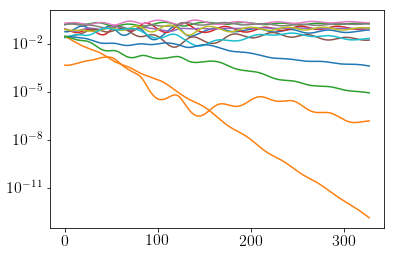

In [167]:
n_traj = data['n_traj_dict'][-1]
K = n_traj.shape[0]
for ii in range(K):
    plt.plot(n_traj[ii,:])
    
plt.yscale('log')

In [168]:
print(data.keys())

dict_keys(['sig_S', 'current_species_idx', 'parent_idx_dict', 'K_tot', 'sim_start_time', 'S_mean_ave_list', 'S', 'gamma', 'epoch_num', 'sample_num', 'mu', 'n_traj_dict', 'epoch_time_list', 'D', 'n_init', 'thresh', 'n2_mean_ave_list', 'sim_end_time', 'dt_list', 'S_mean_std_list', 'm', 'seed', 'starting_species_idx_list', 'V_init', 'dt', 'n2_mean_std_list', 'n2_mean_array', 'lambda_mean_ave_list', 'n_mean_ave_list', 'force_mean_ave_list', 'file_name', 'K0', 'corr_mut', 'n0', 'lambda_mean_array', 'S_init', 'n_mean_array', 'N', 'epochs_to_save_traj', 'n_mean_std_list', 'invasion_freq', 'count_short', 'lambda_mean_std_list', 'V', 'epoch_timescale', 'n_init_list', 'force_mean_std_list'])


In [172]:
data['S_mean_ave_list']

[0.14914136657601845,
 0.1459668139749145,
 0.14665912696609273,
 0.14653082125221079,
 0.1400005767141467,
 0.13626986800567273]

In [173]:
data['force_mean_ave_list']

[array([-0.38084834,  0.2205694 , -0.14424036, -0.24084348, -0.3995054 ,
        -0.43199661, -0.15206019,  0.27025124,  0.09846022, -0.29856798,
        -0.19589094,  0.03515733, -0.00836473, -0.87100571, -0.01822147,
        -0.35887331,  0.12428865,  0.2928585 , -0.56288652,  0.22980601,
         0.04677926, -0.7227832 , -0.12173687,  0.14749135,  0.23007154,
        -0.05885902,  0.01862121,  0.00366338, -0.2108421 ,  0.03422039]),
 array([ 0.29307575,  0.2074248 , -0.20728251, -0.03376791,  0.10404617,
         0.29251237,  0.27051973,  0.02061087,  0.20576675, -0.10027346,
        -0.01196976,  0.15002236, -0.34513743, -0.0689253 ]),
 array([ 0.29503593,  0.20381596, -0.03215684,  0.10522347,  0.29425792,
         0.27026474,  0.02201441,  0.20757958, -0.01018074, -0.34219414,
        -0.50150435,  0.03997865]),
 array([ 0.29396713,  0.20489405, -0.03261541,  0.10514532,  0.29333558,
         0.26748418,  0.02172027,  0.20676292, -0.01066291, -0.2415955 ,
        -0.02035322,  0.